# **Movie Recommender System using Python**

##Problem Statement -
To develop a basic recommendation systems using Python and Pandas.

The function of a recommender system is to suggest items which are similar to the items which you are interested in. This system works in a similar way by suggesting movies which are similar to your particular movie choice by using the concept of Correlation.

##**1. Importing Required libraries**
We use Numpy and Pandas for numerical computing and manipulating the data. Matplotlib and Seaborn are used for Data Interpretation and Data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')          #To set the background of all plots as white
%matplotlib inline

##**2. Importing the Data required**
The data is present as a CSV file, Hence using *read_csv()* method to import the data

In [2]:
columns = ['User ID', 'Item ID', 'Ratings', 'Time Duration']      #The default data does not have any headings for columns. Hence giving our own column names for understanding
users = pd.read_csv('User Ratings.data', sep='\t', names=columns)

In [3]:
users.head(10)

,User ID,Item ID,Ratings,Time Duration
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


##**3. Cleaning the Data**

We do not neeed the column 'Time Duration' for our analysis. Using drop() method to delete the column

In [4]:
users = users.drop(columns = ['Time Duration'])
users.head()

,User ID,Item ID,Ratings
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


Importing another dataset which includes the Movie ID and their corressponding Titles

In [5]:
movies = pd.read_csv("Movie ID and Titles")
movies.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [6]:
movies = movies.rename(columns = {'item_id':'Item ID','title':'Titles'})
movies.head()

,Item ID,Titles
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


##Merging Data
We are combining both the datasets for easier manipulation :

In [7]:
users = pd.merge(users,movies,on='Item ID')
users.head(10)

,User ID,Item ID,Ratings,Titles
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)
7,99,50,5,Star Wars (1977)
8,305,50,5,Star Wars (1977)
9,108,50,4,Star Wars (1977)


##**4. Exploratory Data Analysis (EDA)**

Exploring the data frame to get an understanding of parameters like the best rated movies, the average ratings etc.

In [8]:
users.groupby('Titles')['Ratings'].mean().sort_values(ascending=False).head()    #This gives the best rated movies

Titles
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Ratings, dtype: float64

The movies which are shown above as Best Rated doesn't really make sense. This is because these movies have a higher rating, but the number of poeple who have rated these movies is less.
Now we sort the movies based on the number of ratings given, which will make more sense.

In [9]:
users.groupby('Titles')['Ratings'].count().sort_values(ascending=False).head()     #This gives the movies which have been rated the highest number of times

Titles
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

Creating a 'ratings' dataframe with the Average Ratings and the Number of Ratings :

In [10]:
ratings = pd.DataFrame(users.groupby('Titles')['Ratings'].mean())
ratings.head(10)

,Ratings
Titles,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [11]:
ratings['Number of Ratings'] = pd.DataFrame(users.groupby('Titles')['Ratings'].count())
ratings.sort_values(by='Number of Ratings',ascending=False).head(10)

,Ratings,Number of Ratings
Titles,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Visualizing the data using Histograms to get a better understanding

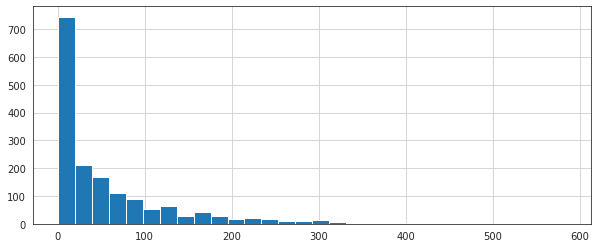

In [12]:
plt.figure(figsize=(10,4))
ratings['Number of Ratings'].hist(bins=30)

In the above plot we can see that the number of ratings for the movies vary from about 700 to 10. But majority movies have more than 100 ratings. Hence for further analysis, we can neglect movies which have less than 100 ratings.

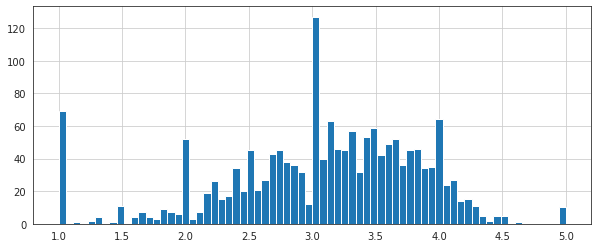

In [13]:
plt.figure(figsize=(10,4))
ratings['Ratings'].hist(bins=70)

The above plot follows a Normal Distribution curve.

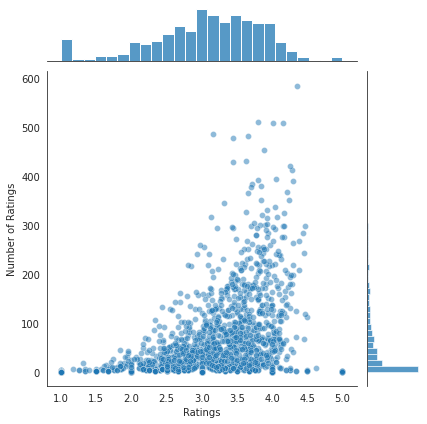

In [14]:
sns.jointplot(x='Ratings',y='Number of Ratings',data=ratings,alpha=0.5)

In the above plot, The area which has high density of dots, those movies are highly rated.

##**5. Creating the Recommendation System**

We first create a matrix table using *pivot_table()* method,

This table has the User ID as the index and the columns are the Movie Titles. The values in this matrix are the Ratings given.

In [15]:
matrix = users.pivot_table(index='User ID',columns='Titles',values='Ratings')
matrix.head(10)

Titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,

In the above table, we see a lot of NaN values which mean that not all users have given ratings to all movies. 

###To Define a Test-case :
We first sort movies based on Number of ratings and select two movies which we will use for this test case.

In [16]:
ratings.sort_values('Number of Ratings',ascending=False).head(10)

,Ratings,Number of Ratings
Titles,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: Fargo, And Toy Story.

Let's grab the User Ratings for these two movies:

In [17]:
fargo = matrix['Fargo (1996)']
toystory = matrix['Toy Story (1995)']
fargo.head(10)

User ID
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
6    5.0
7    5.0
8    NaN
9    NaN
Name: Fargo (1996), dtype: float64

###Creating a Correlation
We now create a Correlation between the movie ratings and the matrix table we created earlier. We use *corrwith()* method to achieve this.

In [18]:
fargo_similar = matrix.corrwith(fargo)
toystory_similar = matrix.corrwith(toystory)
fargo_similar.head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Titles
'Til There Was You (1997)                      0.100000
1-900 (1994)                                   0.866025
101 Dalmatians (1996)                         -0.245368
12 Angry Men (1957)                            0.098676
187 (1997)                                     0.142509
2 Days in the Valley (1996)                    0.338319
20,000 Leagues Under the Sea (1954)            0.270497
2001: A Space Odyssey (1968)                   0.299882
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.008565
dtype: float64

Cleaning this by removing NaN values:

In [19]:
corr_fargo = pd.DataFrame(fargo_similar,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head(10)

,Correlation
Titles,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
2 Days in the Valley (1996),0.338319
"20,000 Leagues Under the Sea (1954)",0.270497
2001: A Space Odyssey (1968),0.299882
"39 Steps, The (1935)",0.008565


Now sorting the above table should give us the most similar movies to the one we need: 

In [20]:
corr_fargo.sort_values('Correlation',ascending=False).head(10)

,Correlation
Titles,
Open Season (1996),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0
Fargo (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Journey of August King, The (1995)",1.0
King of the Hill (1993),1.0


We can see above that the correlation is 1 (maximum) for all the movies. Also, the suggested movies do not make sense. This is because the algorithm is considering all the movies which have less number of ratings as well.

Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [21]:
corr_fargo = corr_fargo.join(ratings['Number of Ratings'])
corr_fargo.head(10)

,Correlation,Number of Ratings
Titles,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41
2 Days in the Valley (1996),0.338319,93
"20,000 Leagues Under the Sea (1954)",0.270497,72
2001: A Space Odyssey (1968),0.299882,259
"39 Steps, The (1935)",0.008565,59


Now sort the values and notice how the titles make a lot more sense:

In [22]:
corr_fargo[corr_fargo['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
Titles,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121


Now the same for the movie Toy Story:

In [23]:
corr_toystory = pd.DataFrame(toystory_similar,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings['Number of Ratings'])
corr_toystory[corr_toystory['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
Titles,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


##**6. Conclusion:**
The above recommendation system is not a robust one. It just suggests movies which have similar user ratings based on correlation. This can be improvised using further techniques like AI to find similar movies based on parameters like genre, number of views, ratings etc.